In [14]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [15]:
#这个示例中，cities是一个包含20个城市坐标的列表。
#simulated_annealing函数接受一个城市列表、初始温度和降温速率作为输入，并返回最优路径。在模拟退火过程中，
#每次通过交换两个城市的顺序来生成新解，并根据新解和当前解的目标函数值之差以及当前温度来计算接受新解的概率。

In [16]:
def distance(city1, city2):
    return math.sqrt((city1[0]-city2[0])**2 + (city1[1]-city2[1])**2)

def total_distance(cities):
    dist = 0
    for i in range(len(cities)-1):
        dist += distance(cities[i], cities[i+1])
    dist += distance(cities[-1], cities[0])
    return dist

In [17]:
def simulated_annealing(cities, temp=1000, cooling_rate=0.003):
    current_solution = cities.copy()
    best_solution = cities.copy()
    while temp > 1:
        new_solution = current_solution.copy()
        i = random.randint(0, len(new_solution)-1)
        j = random.randint(0, len(new_solution)-1)
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
        current_energy = total_distance(current_solution)
        new_energy = total_distance(new_solution)
        if math.exp((current_energy - new_energy) / temp) > random.random():
            current_solution = new_solution   #math.exp((current_energy - new_energy) / temp)。其中 current_energy 是当前解决方案的能量，
                                            #new_energy 是新解决方案的能量，temp 是当前温度。随着温度的降低，接受劣质解决方案的概率也会降低。
        if total_distance(current_solution) < total_distance(best_solution):
            best_solution = current_solution
        temp *= 1 - cooling_rate    #降低温度，以便在搜索过程中逐渐减少接受劣质解决方案的概率(TEMP越大，退火速度越快，接受局部最优解概率越大)
    return best_solution

In [18]:
cities = [(random.uniform(-1000, 1000), random.uniform(-1000, 1000)) for i in range(10)]
best_solution = simulated_annealing(cities)
#print(best_solution)
print("最佳路径是：")
for i in range(len(best_solution)):
    print(best_solution[i])
    print("↓↓↓↓↓↓↓↓")
print(best_solution[0])

最佳路径是：
(784.5486361566261, -817.2551665583916)
↓↓↓↓↓↓↓↓
(523.0388246029452, -369.3963953824717)
↓↓↓↓↓↓↓↓
(718.5213354374707, 227.72749163913454)
↓↓↓↓↓↓↓↓
(603.3514677561759, 544.4578915134471)
↓↓↓↓↓↓↓↓
(335.2276845946201, 643.3256827780397)
↓↓↓↓↓↓↓↓
(-212.36614937626427, 488.67112016747683)
↓↓↓↓↓↓↓↓
(-631.5664993264289, 662.7489301636986)
↓↓↓↓↓↓↓↓
(-750.7708936065152, -771.8548997789329)
↓↓↓↓↓↓↓↓
(55.93727231393132, -972.7046708868603)
↓↓↓↓↓↓↓↓
(254.80465805050426, -622.1492106700202)
↓↓↓↓↓↓↓↓
(784.5486361566261, -817.2551665583916)


In [19]:
#END

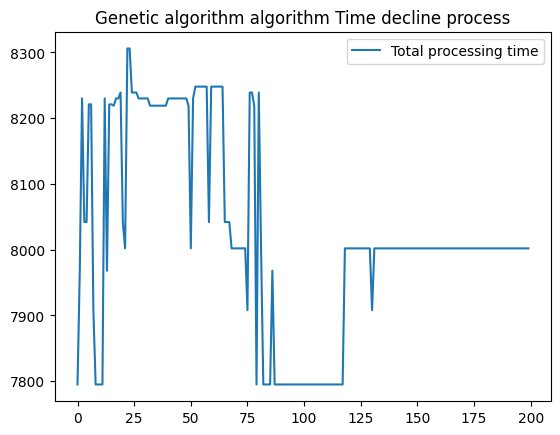

8001.999999999999


In [20]:
import random
import numpy as np

def cal_fitness(population, process_time):
    fitness = []
    for i in range(len(population)):
        time = np.zeros((process_time.shape[0], process_time.shape[1]))
        for j in range(process_time.shape[0]):
            for k in range(process_time.shape[1]):
                if j == 0 and k == 0:
                    time[j][k] = process_time[j][population[i][k]]
                elif j == 0 and k != 0:
                    time[j][k] = time[j][k-1] + process_time[j][population[i][k]]
                elif j != 0 and k == 0:
                    time[j][k] = time[j-1][k] + process_time[j][population[i][k]]
                else:
                    time[j][k] = max(time[j-1][k], time[j][k-1]) + process_time[j][population[i][k]]
        fitness.append(1/time[-1][-1])
    return fitness

def selection(fitness, population):
    fitness_sum = []
    for i in range(len(fitness)):
        if i == 0:
            fitness_sum.append(fitness[i])
        else:
            fitness_sum.append(fitness_sum[i-1] + fitness[i])
    for i in range(len(fitness_sum)):
        fitness_sum[i] /= sum(fitness)
    new_population = []
    for i in range(len(population)):
        rand = random.random()
        for j in range(len(fitness_sum)):
            if j == 0:
                if rand <= fitness_sum[j]:
                    new_population.append(population[j])
                    break
            else:
                if rand <= fitness_sum[j] and rand > fitness_sum[j-1]:
                    new_population.append(population[j])
                    break
    return new_population

def crossover(parent1, parent2):
    index1 = random.randint(0, len(parent1)-2)
    index2 = random.randint(index1, len(parent1)-1)
    temp_child1 = parent1[index1:index2]
    temp_child2 = [item for item in parent2 if item not in temp_child1]
    child = temp_child2[:index1] + temp_child1 + temp_child2[index1:]
    return child

def mutation(child):
    index1 = random.randint(0, len(child)-2)
    index2 = random.randint(index1, len(child)-1)
    child[index1:index2] = reversed(child[index1:index2])
    return child

def GA(process_time, pop_size, elite_size, max_gen, crossover_rate, mutation_rate):
    population = []
    for i in range(pop_size):
        population.append(random.sample(range(process_time.shape[1]), process_time.shape[1]))
    
    best_makespan = []
    
    for gen in range(max_gen):
        fitness = cal_fitness(population, process_time)
        
        best_index = fitness.index(max(fitness))
        best_makespan.append(1/fitness[best_index])
        
        population = selection(fitness, population)
        
        new_population = []
        for i in range(elite_size):
            new_population.append(population.pop(population.index(max(population))))
        
        while len(new_population) < pop_size:
            if random.random() < crossover_rate:
                parent1 = population[random.randint(0,len(population)-1)]
                parent2 = population[random.randint(0,len(population)-1)]
                child = crossover(parent1, parent2)
                if random.random() < mutation_rate:
                    child = mutation(child)
                new_population.append(child)
            else:
                new_population.append(population[random.randint(0,len(population)-1)])
        
        population = new_population
    
    return best_makespan

process_time = np.array([[375, 12, 142, 245, 412], [632, 452, 758, 278, 398], [12, 876, 124, 534, 765], [460, 542, 523, 120, 499], [528, 101, 789, 124, 999], [796, 245, 632, 375, 123], [532, 230, 543, 896, 452], [14, 124, 214, 543, 785], [257, 527, 753, 210, 463], [896, 896, 214, 258, 259], [532, 302, 501, 765, 988]])

pop_size = 100
elite_size = int(0.3 * pop_size)
max_gen = 200
crossover_rate = 0.8
mutation_rate = 0.01

best_makespan = GA(process_time=process_time,
                   pop_size=pop_size,
                   elite_size=elite_size,
                   max_gen=max_gen,
                   crossover_rate=crossover_rate,
                   mutation_rate=mutation_rate)
plt.plot(best_makespan, label = "Total processing time")
plt.legend()
plt.title("Genetic algorithm algorithm Time decline process")
plt.show()
print(best_makespan[-1])

# 上面你给出的解决flowshop问题的遗传算法的代码采用了什么编码方式？

# 上面给出的解决flowshop问题的遗传算法的代码采用了序列编码
# （Order Crossover，OX）方式。

# 在序列编码中，每个个体表示为一个包含所有工件的序列，
# 序列中工件的顺序表示加工顺序。例如，在一个有5个工件的flowshop问题中，
# 个体 [0, 1, 2, 3, 4] 表示按照工件0、工件1、工件2、工件3、
# 工件4的顺序进行加工。

# 在交叉操作中，采用了部分匹配交叉（Partially Matched Crossover，PMX）
# 方法。首先随机选择两个交叉点，然后将两个父代个体在交叉点之间的部分互换，
# 最后根据父代个体中未被交换部分的顺序调整子代个体中未被交换部分的顺序。

# 在变异操作中，采用了逆转序列变异（Inversion Mutation）方法。
# 随机选择两个变异点，然后将两个变异点之间的部分逆序排列。

# 上面给出的解决flowshop问题的遗传算法的代码采用了轮盘赌选择
# （Roulette Wheel Selection）方法。

# 在轮盘赌选择中，每个个体被选中的概率与其适应度成正比。
# 首先计算种群中所有个体的适应度之和，然后计算每个个体的累积概率。接着，
# 对于每个新个体，生成一个0到1之间的随机数，根据随机数落在哪个区间来选择
# 相应的个体。

# 例如，在一个有4个个体的种群中，每个个体的适应度分别为1、2、3、4。
# 则每个个体被选中的概率分别为1/10、2/10、3/10、4/10，累积概率分别为0.1、
# 0.3、0.6、1。如果生成的随机数小于等于0.1，则选择第一个个体；
# 如果大于0.1
# 且小于等于0.3，则选择第二个个体；以此类推。



# 遗传算法可能会陷入局部最优解，这是一种常见的问题。
# 可以通过调整算法的参数来尝试避免这种情况。下面是一些可能有用的方法：

# 增加种群大小（pop_size）。
# 较大的种群可以增加算法搜索空间中不同区域的概率
# ，从而有助于避免陷入局部最优解。

# 增加变异概率（mutation_rate）。
# 较高的变异概率可以增加算法跳出局部最优解的概率。

# 调整精英个体数量（elite_size）。
# 精英策略可以保留当前最优解，但是过多的精英个体可能会导致算法过早收敛。
# 可以尝试减少精英个体数量，以增加算法的多样性。

# 增加最大进化代数（max_gen）。
# 较多的进化代数可以增加算法找到全局最优解的机会。

# 需要注意的是，这些方法并不能保证算法一定能够避免陷入局部最优解。
# 在实际应用中，需要根据具体问题来调整参数。

#交叉概率（crossover_rate）是遗传算法中的一个重要参数，它控
# 制着算法中交叉操作的发生概率。交叉操作可以在种群中产生
# 新的个体，增加算法的多样性。

#调整交叉概率可能会影响算法的性能。较高的交叉概率可以增
# 加算法搜索空间中不同区域的概率，从而有助于避免陷入局
# 部最优解。但是，过高的交叉概率也可能导致算法收敛速度变慢。

#在实际应用中，需要根据具体问题来调整交叉概率。可以通过试验
# 来确定最佳的交叉概率。一般来说，交叉概率通常设置在0.6到
# 0.9之间。


# 这段代码是遗传算法的主要部分，用于进行种群进化。

# max_gen 是最大进化代数，表示算法进行多少代进化。
# 对于每一代进化，都会执行以下步骤：

# 计算适应度。调用 cal_fitness 函数计算种群中每个个体的
# 适应度。

# 记录当前最优解。找到种群中适应度最大的个体，并将其适应
# 度值添加到 best_makespan 列表中。

# 选择操作。调用 selection 函数根据种群中每个个体的适应度
# 进行选择操作，生成新的种群。

# 交叉和变异操作。首先保留精英个体，然后对剩余的个体进行交
# 叉和变异操作。如果随机数小于交叉概率（crossover_rate），
# 则随机选择两个父代个体，调用 crossover 函数进行交叉操作
# ，生成一个子代个体。如果随机数小于变异概率（mutation_rat
# e），则对子代个体进行变异操作。最后将子代个体添加到新种群
# 中。

# 更新种群。将新种群赋值给 population 变量，用于下一代进
# 化。

# 这段代码会不断重复上述步骤，直到达到最大进化代数。

In [22]:
import random

# 遗传算法参数
POPULATION_SIZE = 100
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.9
GENERATIONS = 100

# 爬山算法参数
MAX_ITER = 100

# FLOW-SHOP调度问题参数
NUM_JOBS = 50
NUM_MACHINES = 10
PROCESSING_TIME = [[100, 72, 76, 100, 16, 9, 5, 87, 34, 15], [19, 3, 19, 68, 29, 22, 16, 13, 87, 70], [70, 56, 39, 71, 29, 91, 100, 86, 88, 99], [50, 93, 100, 71, 84, 64, 67, 29, 28, 81], [80, 97, 3, 10, 14, 32, 92, 67, 72, 68], [47, 59, 29, 3, 26, 20, 50, 26, 1, 70], [40, 63, 69, 21, 56, 73, 56, 10, 46, 40], [84, 80, 68, 82, 4, 45, 100, 96, 29, 67], [85, 46, 59, 35, 68, 84, 89, 18, 97, 58], [60, 60, 2, 50, 90, 20, 78, 56, 62, 27], [78, 64, 21, 5, 85, 55, 15, 23, 36, 87], [98, 31, 42, 73, 83, 48, 71, 49, 72, 30], [4, 57, 30, 11, 67, 4, 82, 77, 98, 21], [45, 45, 25, 45, 7, 59, 88, 42, 57, 81], [73, 94, 83, 59, 1, 72, 65, 62, 45, 76], [77, 84, 11, 82, 10, 9, 67, 27, 43, 8], [22, 66, 5, 77, 97, 28, 61, 82, 62, 96], [90, 51, 87, 27, 65, 76, 67, 20, 75, 67], [12, 92, 43, 21, 92, 64, 94, 67, 60, 46], [9, 76, 62, 46, 71, 65, 76, 65, 30, 38], [29, 12, 71, 70, 46, 96, 12, 70, 76, 19], [83, 15, 73, 32, 51, 6, 3, 29, 3, 24], [83, 95, 87, 29, 46, 67, 89, 73, 69, 33], [83, 46, 82, 2, 55, 54, 85, 3, 20, 57], [11, 32, 15, 27, 2, 43, 23, 79, 28, 29], [10, 74, 73, 99, 54, 89, 83, 5, 28, 90], [73, 40, 4, 20, 51, 18, 37, 18, 61, 75], [85, 30, 58, 89, 48, 15, 82, 77, 2, 3], [56, 63, 26, 87, 53, 8, 80, 46, 5, 62], [59, 67, 73, 65, 60, 61, 94, 86, 38, 1], [70, 66, 80, 32, 93, 56, 26, 41, 21, 9], [4, 66, 79, 43, 39, 83, 55, 25, 62, 13], [51, 42, 90, 85, 84, 29, 73, 8, 95, 57], [18, 30, 61, 67, 57, 60, 25, 10, 20, 95], [61, 9, 3, 2, 61, 18, 44, 78, 38, 74], [25, 91, 31, 2, 14, 97, 91, 84, 88, 26], [84, 8, 95, 61, 85, 41, 88, 4, 86, 51], [74, 2, 24, 42, 33, 24, 62, 13, 62, 10], [33, 7, 62, 68, 42, 41, 78, 67, 99, 6], [38, 43, 2, 4, 62, 95, 76, 91, 67, 78], [43, 98, 28, 51, 43, 84, 13, 71, 64, 81], [15, 19, 50, 30, 75, 90, 94, 35, 51, 83], [75, 98, 42, 67, 24, 63, 15, 45, 92, 44], [29, 60, 80, 86, 70, 13, 100, 86, 88, 6], [14, 49, 78, 93, 45, 94, 35, 46, 18, 85], [29, 20, 27, 66, 70, 95, 7, 11, 75, 52], [73, 19, 33, 36, 93, 21, 44, 51, 4, 24], [87, 79, 52, 85, 24, 89, 50, 4, 37, 50], [86, 99, 31, 25, 78, 10, 41, 66, 35, 1], [2, 41, 41, 88, 6, 77, 89, 80, 21, 54]]

# 计算完成时间
def calculate_completion_time(schedule):
    completion_time = [[0 for _ in range(NUM_MACHINES)] for _ in range(NUM_JOBS)]
    for i in range(NUM_JOBS):
        for j in range(NUM_MACHINES):
            if i == 0:
                if j == 0:
                    completion_time[i][j] = PROCESSING_TIME[schedule[i]][j]
                else:
                    completion_time[i][j] = completion_time[i][j-1] + PROCESSING_TIME[schedule[i]][j]
            else:
                if j == 0:
                    completion_time[i][j] = completion_time[i-1][j] + PROCESSING_TIME[schedule[i]][j]
                else:
                    completion_time[i][j] = max(completion_time[i-1][j], completion_time[i][j-1]) + PROCESSING_TIME[schedule[i]][j]
    return completion_time[-1][-1]

# 爬山算法
def hill_climbing(schedule):
    current_schedule = schedule[:]
    current_makespan = calculate_completion_time(current_schedule)
    for _ in range(MAX_ITER):
        new_schedule = current_schedule[:]
        i, j = random.sample(range(NUM_JOBS), 2)
        new_schedule[i], new_schedule[j] = new_schedule[j], new_schedule[i]
        new_makespan = calculate_completion_time(new_schedule)
        if new_makespan < current_makespan:
            current_schedule = new_schedule
            current_makespan = new_makespan
    return current_schedule

# 遗传算法
def genetic_algorithm():
    # 初始化种群
    population = [random.sample(range(NUM_JOBS), NUM_JOBS) for _ in range(POPULATION_SIZE)]
    # 迭代进化
    for _ in range(GENERATIONS):
        # 计算适应度
        fitness = [1 / calculate_completion_time(individual) for individual in population]
        # 轮盘赌选择
        total_fitness = sum(fitness)
        selection_prob = [f / total_fitness for f in fitness]
        new_population = []
        for _ in range(POPULATION_SIZE // 2):
            # 选择两个父代
            parents = random.choices(population, weights=selection_prob, k=2)
            # 交叉
            if random.random() < CROSSOVER_RATE:
                crossover_point = random.randint(1, NUM_JOBS - 1)
                offspring1 = parents[0][:crossover_point] + [x for x in parents[1] if x not in parents[0][:crossover_point]]
                offspring2 = parents[1][:crossover_point] + [x for x in parents[0] if x not in parents[1][:crossover_point]]
            else:
                offspring1, offspring2 = parents[0][:], parents[1][:]
            # 变异
            if random.random() < MUTATION_RATE:
                i, j = random.sample(range(NUM_JOBS), 2)
                offspring1[i], offspring1[j] = offspring1[j], offspring1[i]
            if random.random() < MUTATION_RATE:
                i, j = random.sample(range(NUM_JOBS), 2)
                offspring2[i], offspring2[j] = offspring2[j], offspring2[i]
            # 局部搜索
            offspring1 = hill_climbing(offspring1)
            offspring2 = hill_climbing(offspring2)
            # 添加到新种群中
            new_population.extend([offspring1, offspring2])
        population = new_population[:]
    # 返回最优解
    best_individual = min(population, key=lambda x: calculate_completion_time(x))
    best_makespan = calculate_completion_time(best_individual)
    return best_individual, best_makespan


def test_genetic_algorithm():
    schedule, makespan = genetic_algorithm()
    print('调度方案:', schedule)
    print('完成时间:', makespan)
    assert isinstance(schedule, list)
    assert all(isinstance(x, int) for x in schedule)
    assert len(schedule) == NUM_JOBS
    assert len(set(schedule)) == NUM_JOBS
    assert isinstance(makespan, int)

if __name__ == '__main__':
    test_genetic_algorithm()


调度方案: [12, 13, 39, 38, 41, 43, 1, 34, 24, 31, 2, 26, 35, 46, 16, 20, 33, 36, 0, 8, 32, 25, 18, 4, 49, 21, 19, 44, 7, 6, 37, 10, 23, 45, 29, 40, 5, 3, 22, 14, 30, 9, 17, 47, 42, 48, 11, 27, 28, 15]
完成时间: 3284
